##  Library Instalation

In [2]:
!pip install git+https://github.com/oracle/Skater.git

  Cloning https://github.com/oracle/Skater.git to c:\users\iankk\appdata\local\temp\pip-req-build-l7zr1dbo
  Resolved https://github.com/oracle/Skater.git to commit 1ad4b4657a51ede7312fd9545e0db46316d481b3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 275.7/275.7 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 115.7/115.7 kB 563.9 kB/s eta 0:00:00
     ------------------------------------ 278.7/278.7 kB 903.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skater: filename=skater-1.1.2b1-py3-none-any.whl size=120908 sha256=a6f69774197779ff82a0a42071360d159d487803b641aeb153ab984fbc

  Running command git clone --filter=blob:none --quiet https://github.com/oracle/Skater.git 'C:\Users\iankk\AppData\Local\Temp\pip-req-build-l7zr1dbo'
  on a case-insensitive filesystem) and only one from the same
  colliding group is in the working tree:

    'examples/python-deployed-model/README.md'
    'examples/python-deployed-model/readme.md'


  Cloning https://github.com/oracle/Skater.git to c:\users\iankk\appdata\local\temp\pip-req-build-75iqh1rt
  Resolved https://github.com/oracle/Skater.git to commit 1ad4b4657a51ede7312fd9545e0db46316d481b3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached multiprocess-0.70.14-py37-none-any.whl (115 kB)
  Using cached pydotplus-2.0.2-py3-none-any.whl
  Using cached bs4-0.0.1-py3-none-any.whl


  Running command git clone --filter=blob:none --quiet https://github.com/oracle/Skater.git 'C:\Users\iankk\AppData\Local\Temp\pip-req-build-75iqh1rt'
  on a case-insensitive filesystem) and only one from the same
  colliding group is in the working tree:

    'examples/python-deployed-model/README.md'
    'examples/python-deployed-model/readme.md'


  Created wheel for skater: filename=skater-1.1.2b1-py3-none-any.whl size=120908 sha256=f8fddf2a4c38ce8232d41d5d314ad64b2175e572cdc059119abe91799b6ca680
  Stored in directory: C:\Users\iankk\AppData\Local\Temp\pip-ephem-wheel-cache-ucq0io2t\wheels\bc\e1\05\2b5d1c01d1e582236157f04b759d2e140ccc6703f599148c72
Successfully built skater


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from timeit import timeit
from sklearn import datasets, tree
import datetime
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import pylab 
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#from graphviz import Source
from IPython.display import Image
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
##from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
#from mlxtend.classifier import StackingClassifier
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import scipy
from sklearn.model_selection import GridSearchCV
from google.cloud import bigquery
from sklearn.model_selection import TimeSeriesSplit


## Extracting the Data

In [2]:
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")

In [3]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=jmKmeOuzDIfNBPTKc7Qmg5SKc46bB6&access_type=offline&code_challenge=N7XF5bROSuQ_b9bGNFrU4OdAamNFkYBn_rn34h_wJYs&code_challenge_method=S256


Credentials saved to file: [C:\Users\iankk\AppData\Roaming\gcloud\application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "egd-project" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning t

## Data Loading

In [4]:
query = client.query("""
   SELECT *
   FROM 
       tables_staging.df_models
   
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET
0,103019167,170112,6,2022,2,1,4,14,33,61,7,19,37,47,7.00,6.46,5.44,6.00,2.25,3.50,3.55,3.72,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,<NA>,1,5,1701,1
1,129125337,170112,6,2022,2,1,0,0,0,28,0,0,0,56,0.00,0.00,0.00,5.11,0.00,0.00,0.00,11.00,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,0,1,5,1701,1
2,124709728,170112,5,2022,2,1,0,1,1,9,0,2,2,11,0.00,0.00,0.00,22.75,0.00,2.00,2.00,2.11,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,M,5,3,6,1701,0
3,131316167,170112,3,2022,1,1,0,0,0,6,0,0,0,44,0.00,0.00,0.00,11.20,0.00,0.00,0.00,15.83,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,M,2,3,6,1701,1
4,87608205,170112,3,2022,1,1,0,7,12,27,0,23,29,55,0.00,8.17,15.45,13.15,0.00,9.29,7.92,10.07,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,1,1,5,1701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,87518647,10202,3,2022,1,1,7,18,18,18,13,34,34,34,2.50,4.94,4.94,4.94,2.57,3.78,3.78,3.78,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,F,1,3,5,102,1
999996,87544042,10202,3,2022,1,1,0,0,0,9,0,0,0,25,0.00,0.00,0.00,14.12,0.00,0.00,0.00,4.44,255,685,1466,3176,215,449,748,1254,0,0,0,1,0.00,0.00,0.00,0.00,M,3,2,3,102,1
999997,129843808,10202,3,2022,1,1,0,0,0,5,0,0,0,13,0.00,0.00,0.00,6.75,0.00,0.00,0.00,3.00,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,None,<NA>,2,5,102,0
999998,124728229,10202,3,2022,1,1,0,0,1,11,0,0,6,19,0.00,0.00,0.00,24.90,0.00,0.00,7.00,4.18,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,F,2,3,5,102,0


In [5]:
df.isnull().sum()

CUSTOMER_ACCOUNT_NR_MASK                                     0
SUBCAT_CD_EXT                                                0
MONTH                                                        0
YEAR                                                         0
QUARTER                                                      0
SEMESTER                                                     0
CUST_NUM_TRANSACTIONS_MONTH                                  0
CUST_NUM_TRANSACTIONS_QUARTER                                0
CUST_NUM_TRANSACTIONS_SEMESTER                               0
CUST_NUM_TRANSACTIONS_YEAR                                   0
CUST_NUM_UNIQUE_SUBCAT_MONTH                                 0
CUST_NUM_UNIQUE_SUBCAT_QUARTER                               0
CUST_NUM_UNIQUE_SUBCAT_SEMESTER                              0
CUST_NUM_UNIQUE_SUBCAT_YEAR                                  0
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH                  0
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER          

In [8]:
#wines = wines_binary_norm.sample(frac=1, random_state=101).reset_index(drop=True)
y_tp = df['TARGET']
#df = df.dropna()
cols = df.columns 
#drop df columns gender and family members
#df = df.drop('FAMILY_MEMBERS', axis=0)
#cols = list(cols.drop(['GENDER','FAMILY_MEMBERS']))


X_train, X_test, y_train, y_test = train_test_split(df.loc[:, cols[:-2]], y_tp, test_size=0.20, random_state=101)

In [9]:
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET
0,103019167,170112,6,2022,2,1,4,14,33,61,7,19,37,47,7.00,6.46,5.44,6.00,2.25,3.50,3.55,3.72,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,<NA>,1,5,1701,1
1,129125337,170112,6,2022,2,1,0,0,0,28,0,0,0,56,0.00,0.00,0.00,5.11,0.00,0.00,0.00,11.00,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,0,1,5,1701,1
2,124709728,170112,5,2022,2,1,0,1,1,9,0,2,2,11,0.00,0.00,0.00,22.75,0.00,2.00,2.00,2.11,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,M,5,3,6,1701,0
3,131316167,170112,3,2022,1,1,0,0,0,6,0,0,0,44,0.00,0.00,0.00,11.20,0.00,0.00,0.00,15.83,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,M,2,3,6,1701,1
4,87608205,170112,3,2022,1,1,0,7,12,27,0,23,29,55,0.00,8.17,15.45,13.15,0.00,9.29,7.92,10.07,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,1,1,5,1701,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,87518647,10202,3,2022,1,1,7,18,18,18,13,34,34,34,2.50,4.94,4.94,4.94,2.57,3.78,3.78,3.78,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,F,1,3,5,102,1
999996,87544042,10202,3,2022,1,1,0,0,0,9,0,0,0,25,0.00,0.00,0.00,14.12,0.00,0.00,0.00,4.44,255,685,1466,3176,215,449,748,1254,0,0,0,1,0.00,0.00,0.00,0.00,M,3,2,3,102,1
999997,129843808,10202,3,2022,1,1,0,0,0,5,0,0,0,13,0.00,0.00,0.00,6.75,0.00,0.00,0.00,3.00,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,None,<NA>,2,5,102,0
999998,124728229,10202,3,2022,1,1,0,0,1,11,0,0,6,19,0.00,0.00,0.00,24.90,0.00,0.00,7.00,4.18,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,F,2,3,5,102,0


In [10]:
X_test

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD
180580,131259009,90203,4,2022,2,1,0,0,0,2,0,0,0,4,0.00,0.00,0.00,4.00,0.00,0.00,0.00,2.00,25,78,135,297,23,63,100,191,0,0,0,0,0.00,0.00,0.00,0.00,F,1,2,6
209773,87567629,170307,10,2021,4,2,0,0,0,2,0,0,0,7,0.00,0.00,0.00,130.00,0.00,0.00,0.00,4.00,28,188,255,381,26,148,182,233,0,0,0,0,0.00,0.00,0.00,0.00,M,2,1,5
820631,83714968,100204,6,2021,2,1,4,6,7,17,20,21,23,52,8.33,12.80,29.17,22.31,9.00,8.33,7.71,8.35,433,1369,2808,6076,327,640,819,1247,1,1,1,2,0.00,0.00,0.00,154.00,F,2,1,5
886397,87653528,60404,4,2021,2,1,0,4,4,16,0,10,10,30,0.00,6.33,6.33,12.80,0.00,2.75,2.75,4.31,201,628,1283,2739,169,381,513,804,0,0,0,0,0.00,0.00,0.00,0.00,F,3,3,3
672192,100492827,60304,10,2021,4,2,3,9,21,39,27,56,65,81,13.50,10.38,8.45,9.26,14.33,12.78,9.95,10.46,126,386,753,1338,107,273,427,571,0,1,1,2,0.00,0.00,0.00,301.00,M,<NA>,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659166,130091727,50203,10,2021,4,2,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,378,1176,2353,3778,316,709,969,1149,0,0,0,0,0.00,0.00,0.00,0.00,M,3,3,4
224108,109169971,50202,1,2022,1,1,0,0,0,14,0,0,0,19,0.00,0.00,0.00,7.46,0.00,0.00,0.00,2.07,286,855,1742,3716,258,567,888,1380,0,0,0,0,0.00,0.00,0.00,0.00,None,<NA>,3,5
988113,120545647,10207,6,2022,2,1,0,0,0,3,0,0,0,4,0.00,0.00,0.00,7.00,0.00,0.00,0.00,1.33,250,656,1233,2740,219,486,762,1345,0,0,0,0,0.00,0.00,0.00,0.00,None,<NA>,4,2
536495,103033948,50305,1,2022,1,1,0,0,0,6,0,0,0,20,0.00,0.00,0.00,24.40,0.00,0.00,0.00,6.17,87,272,582,1278,76,181,313,548,0,0,0,0,0.00,0.00,0.00,0.00,F,2,3,3


### Splitting the Data with CV

In [11]:
df['fulldate'] = pd.to_datetime(df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str))


In [12]:
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET,fulldate
0,103019167,170112,6,2022,2,1,4,14,33,61,7,19,37,47,7.00,6.46,5.44,6.00,2.25,3.50,3.55,3.72,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,<NA>,1,5,1701,1,2022-06-01
1,129125337,170112,6,2022,2,1,0,0,0,28,0,0,0,56,0.00,0.00,0.00,5.11,0.00,0.00,0.00,11.00,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,0,1,5,1701,1,2022-06-01
2,124709728,170112,5,2022,2,1,0,1,1,9,0,2,2,11,0.00,0.00,0.00,22.75,0.00,2.00,2.00,2.11,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,M,5,3,6,1701,0,2022-05-01
3,131316167,170112,3,2022,1,1,0,0,0,6,0,0,0,44,0.00,0.00,0.00,11.20,0.00,0.00,0.00,15.83,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,M,2,3,6,1701,1,2022-03-01
4,87608205,170112,3,2022,1,1,0,7,12,27,0,23,29,55,0.00,8.17,15.45,13.15,0.00,9.29,7.92,10.07,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,F,1,1,5,1701,0,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,87518647,10202,3,2022,1,1,7,18,18,18,13,34,34,34,2.50,4.94,4.94,4.94,2.57,3.78,3.78,3.78,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,F,1,3,5,102,1,2022-03-01
999996,87544042,10202,3,2022,1,1,0,0,0,9,0,0,0,25,0.00,0.00,0.00,14.12,0.00,0.00,0.00,4.44,255,685,1466,3176,215,449,748,1254,0,0,0,1,0.00,0.00,0.00,0.00,M,3,2,3,102,1,2022-03-01
999997,129843808,10202,3,2022,1,1,0,0,0,5,0,0,0,13,0.00,0.00,0.00,6.75,0.00,0.00,0.00,3.00,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,None,<NA>,2,5,102,0,2022-03-01
999998,124728229,10202,3,2022,1,1,0,0,1,11,0,0,6,19,0.00,0.00,0.00,24.90,0.00,0.00,7.00,4.18,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,F,2,3,5,102,0,2022-03-01


In [13]:
#df['fulldate'] type
df['fulldate'].dtype


dtype('<M8[ns]')

In [14]:
# change from dtype datetime64[ns] to date time month
df['fulldate'] = df['fulldate'].dt.to_period('M')


In [15]:
df['fulldate'].dt.month.head(5)

0    6
1    6
2    5
3    3
4    3
Name: fulldate, dtype: int64

In [16]:
df['fulldate'].dt.year.tail(5)

999995    2022
999996    2022
999997    2022
999998    2022
999999    2022
Name: fulldate, dtype: int64

In [17]:
df.value_counts('fulldate').sort_index()

fulldate
2021-01    41658
2021-02    41764
2021-03    41641
2021-04    41662
2021-05    41728
2021-06    41452
2021-07    41594
2021-08    41770
2021-09    41466
2021-10    41511
2021-11    41638
2021-12    41657
2022-01    41679
2022-02    41499
2022-03    41562
2022-04    41542
2022-05    41946
2022-06    41840
2022-07    41817
2022-08    41633
2022-09    41706
2022-10    41932
2022-11    41496
2022-12    41807
Freq: M, dtype: int64

## Cross Validation

In [107]:
#### CrossValidation do Ian

timestamps = df['fulldate'].sort_values().unique()
timestamps.size


24

In [108]:
timestamps.size

24

In [109]:
for i in range(timestamps.size):
    print(df.loc[timestamps[i] == df['fulldate']].shape[0])

41658
41764
41641
41662
41728
41452
41594
41770
41466
41511
41638
41657
41679
41499
41562
41542
41946
41840
41817
41633
41706
41932
41496
41807


In [116]:
for ts in timestamps:
    if (ts - min_timestamp).n < 12:
        print('train')
    else:
        print('test')

train
train
train
train
train
train
train
train
train
train
train
train
test
test
test
test
test
test
test
test
test
test
test
test


In [115]:

# find the minimum timestamp
min_timestamp = timestamps[0]

# iterate over the timestamps and check if the time difference is less than 12 months
for ts in timestamps:
    if (ts - min_timestamp).n < 12:
        print('train')
        train = df[df['fulldate'] <= ts]
        print(train.shape)
    else:
        train = df[(df['fulldate'] < ts) & ((df['fulldate'] > ts).n - 12)]
    test = df[df['fulldate'] == ts]
    print('test')
    print(test.shape)


train
(41658, 45)
test
(41658, 45)
train
(83422, 45)
test
(41764, 45)
train
(125063, 45)
test
(41641, 45)
train
(166725, 45)
test
(41662, 45)
train
(208453, 45)
test
(41728, 45)
train
(249905, 45)
test
(41452, 45)
train
(291499, 45)
test
(41594, 45)
train
(333269, 45)
test
(41770, 45)
train
(374735, 45)
test
(41466, 45)
train
(416246, 45)
test
(41511, 45)
train
(457884, 45)
test
(41638, 45)
train
(499541, 45)
test
(41657, 45)


AttributeError: 'Series' object has no attribute 'n'

In [55]:
# X-fold cross validation with 12 months sliding window

for i in timestamps:
    print(i)
    if i - timestamps.min() < 12:
        train = df[df['fulldate'] < i]
    else:
        train = df[(df['fulldate'] < i) & (df['fulldate'] > i - 12)]
    test = df[df['fulldate'] == i]
    print(train.shape, test.shape)

2021-01


TypeError: '<' not supported between instances of 'pandas._libs.tslibs.offsets.MonthEnd' and 'int'

In [117]:

X = df.loc[:, cols[:-1]].values

y= df['TARGET']

# Generate training/testing indices using sliding window where window size is 12 months, starting from the Feb. 2021 and ending in Nov. 2022


train_start_date = pd.to_datetime('2021-02-01')
train_end_date = pd.to_datetime('2021-12-01')

# Create a boolean mask to indicate the training rows
#train_mask = (df['fulldate'] >= train_start_date) & (df['fulldate'] <= train_end_date)

# Define the size of the sliding window
window_size = 3  # e.g. 3 months

# Iterate over the sliding windows
for i in range(len(df) - window_size):
    # Define the start and end dates for the training and testing windows
    print("\nSTART OF ITERATION\n")
    train_start = df.iloc[i]['fulldate']
    print(f"Train Start n.{i}: {train_start}")
    train_end = df.iloc[i + window_size - 1]['fulldate']
    print(f"\nTrain End n.{i}: {train_start}")
    test_start = df.iloc[i + window_size]['fulldate']
    print(f"\nTest Start n.{i}: {train_start}")
    test_end = df.iloc[i + window_size]['fulldate'] + pd.DateOffset(months=1)
    print(f"\nTest End n.{i}: {train_start}")
    print("\nEND OF ITERATION\n")
    
    # Create a boolean mask to indicate the training rows
    # train_mask = (df['fulldate'] >= train_start) & (df['fulldate'] <= train_end)
    
    # # Extract the features and target variables
    # X_train = df.loc[train_mask, cols[:-1]]
    # y_train = df.loc[train_mask, 'TARGET']
    
    # # Create a boolean mask to indicate the testing rows
    # test_mask = (df['fulldate'] >= test_start) & (df['fulldate'] <= test_end)
    
    # # Extract the features and target variables
    # X_test = df.loc[test_mask, cols[:-1]]
    # y_test = df.loc[test_mask, 'TARGET']


START OF ITERATION

Train Start n.0: 2022-06-01 00:00:00

Train End n.0: 2022-06-01 00:00:00

Test Start n.0: 2022-06-01 00:00:00

Test End n.0: 2022-06-01 00:00:00

END OF ITERATION


START OF ITERATION

Train Start n.1: 2022-05-01 00:00:00

Train End n.1: 2022-05-01 00:00:00

Test Start n.1: 2022-05-01 00:00:00

Test End n.1: 2022-05-01 00:00:00

END OF ITERATION


START OF ITERATION

Train Start n.2: 2022-03-01 00:00:00

Train End n.2: 2022-03-01 00:00:00

Test Start n.2: 2022-03-01 00:00:00

Test End n.2: 2022-03-01 00:00:00

END OF ITERATION


START OF ITERATION

Train Start n.3: 2022-03-01 00:00:00

Train End n.3: 2022-03-01 00:00:00

Test Start n.3: 2022-03-01 00:00:00

Test End n.3: 2022-03-01 00:00:00

END OF ITERATION


START OF ITERATION

Train Start n.4: 2022-02-01 00:00:00

Train End n.4: 2022-02-01 00:00:00

Test Start n.4: 2022-02-01 00:00:00

Test End n.4: 2022-02-01 00:00:00

END OF ITERATION


START OF ITERATION

Train Start n.5: 2022-05-01 00:00:00

Train End n.5: 2

KeyboardInterrupt: 

In [189]:
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET,fulldate
0,103019167,170112,6,2022,2,1,4,14,33,61,7,19,37,47,7.00,6.46,5.44,6.00,2.25,3.50,3.55,3.72,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,1,5,1701,1,2022-06
1,129125337,170112,6,2022,2,1,0,0,0,28,0,0,0,56,0.00,0.00,0.00,5.11,0.00,0.00,0.00,11.00,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,1,5,1701,1,2022-06
2,124709728,170112,5,2022,2,1,0,1,1,9,0,2,2,11,0.00,0.00,0.00,22.75,0.00,2.00,2.00,2.11,0,0,1,110,0,0,1,87,0,0,0,0,0.00,0.00,0.00,0.00,3,6,1701,0,2022-05
3,131316167,170112,3,2022,1,1,0,0,0,6,0,0,0,44,0.00,0.00,0.00,11.20,0.00,0.00,0.00,15.83,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,3,6,1701,1,2022-03
4,87608205,170112,3,2022,1,1,0,7,12,27,0,23,29,55,0.00,8.17,15.45,13.15,0.00,9.29,7.92,10.07,0,1,1,110,0,1,1,87,0,0,0,0,0.00,0.00,0.00,0.00,1,5,1701,0,2022-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,87518647,10202,3,2022,1,1,7,18,18,18,13,34,34,34,2.50,4.94,4.94,4.94,2.57,3.78,3.78,3.78,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,3,5,102,1,2022-03
999996,87544042,10202,3,2022,1,1,0,0,0,9,0,0,0,25,0.00,0.00,0.00,14.12,0.00,0.00,0.00,4.44,255,685,1466,3176,215,449,748,1254,0,0,0,1,0.00,0.00,0.00,0.00,2,3,102,1,2022-03
999997,129843808,10202,3,2022,1,1,0,0,0,5,0,0,0,13,0.00,0.00,0.00,6.75,0.00,0.00,0.00,3.00,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,2,5,102,0,2022-03
999998,124728229,10202,3,2022,1,1,0,0,1,11,0,0,6,19,0.00,0.00,0.00,24.90,0.00,0.00,7.00,4.18,255,685,1466,3176,215,449,748,1254,0,0,0,0,0.00,0.00,0.00,0.00,3,5,102,0,2022-03


In [190]:
#count different unique index values
df.index.nunique()


1000000

In [191]:
df.set_index('fulldate', inplace=True)


In [194]:
n_splits = df.index.nunique()

In [195]:
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import time

start_time = time.time()

#df.set_index('fulldate', inplace=True)
# Create a TimeSeriesSplit object with n_splits = 5
tscv = TimeSeriesSplit(gap=0, max_train_size=12, n_splits=n_splits, test_size=1)


# Iterate through the splits and train/test indices
for train_index, test_index in tscv.split(df):
        train_data = df.iloc[train_index]
        test_data = df.iloc[test_index]
        print(test_data)
        # print("\nSTART OF ITERATION\n")
        # X_train = df.loc[train_index, cols[:-1]]
        # print(f"Iteration n.{train_index}: {X_train}")
        # y_train = df.loc[train_index, 'TARGET']
        # print(f"Iteration n.{train_index}: {y_train}")
        # X_test = df.loc[test_index, cols[:-1]]
        # print(f"Iteration n.{test_index}: {X_test}")
        # y_test = df.loc[test_index, 'TARGET']
        # print(f"Iteration n.{test_index}: {y_test}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")    
    # Your code for model training and evaluation goes here

          CUSTOMER_ACCOUNT_NR_MASK  SUBCAT_CD_EXT  MONTH  YEAR  QUARTER  \
fulldate                                                                  
2022-03                   93926362          10202      3  2022        1   

          SEMESTER  CUST_NUM_TRANSACTIONS_MONTH  \
fulldate                                          
2022-03          1                            0   

          CUST_NUM_TRANSACTIONS_QUARTER  CUST_NUM_TRANSACTIONS_SEMESTER  \
fulldate                                                                  
2022-03                               3                               4   

          CUST_NUM_TRANSACTIONS_YEAR  CUST_NUM_UNIQUE_SUBCAT_MONTH  \
fulldate                                                             
2022-03                           22                             0   

          CUST_NUM_UNIQUE_SUBCAT_QUARTER  CUST_NUM_UNIQUE_SUBCAT_SEMESTER  \
fulldate                                                                    
2022-03                      

In [ ]:


# Load the time series data into a pandas DataFrame with a datetime index
df = pd.read_csv('time_series_data.csv', index_col='datetime', parse_dates=True)

# Create a TimeSeriesSplit object with n_splits = 5
tscv = TimeSeriesSplit(n_splits=5)

# Iterate through the splits and extract the training and testing data for each fold
for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    # Your code for model training and evaluation goes here

In [123]:
window_size = 12

#randomly generate an array composed of 24 arrays with two values in each one
X = np.random.randint(10, size=(23, 2))

#generate array with the labels of each month for two years (1 to 24)
y = np.arange(1,25)

# Generate training/testing indices using sliding window
start_index = 0
end_index = 12
window_size = 12

# Define training and testing indices
train_start = 0
train_end = 12
test_start = train_end
test_end = len(X)

for i in range(len(X) - window_size):
    # Define training and testing indices
    train_start = i
    train_end = i + window_size
    test_start = i + window_size
    test_end = i + window_size + 1
    
    # Generate training/testing indices
    train_indices = np.arange(train_start, train_end)
    test_indices = np.arange(test_start, test_end)
    
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]
TRAIN: [ 2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14]
TRAIN: [ 3  4  5  6  7  8  9 10 11 12 13 14] TEST: [15]
TRAIN: [ 4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16]
TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17]
TRAIN: [ 6  7  8  9 10 11 12 13 14 15 16 17] TEST: [18]
TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18] TEST: [19]
TRAIN: [ 8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20]
TRAIN: [ 9 10 11 12 13 14 15 16 17 18 19 20] TEST: [21]
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22]


In [128]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4],
              [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4],
              [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4],
              [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])

y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

tscv = TimeSeriesSplit(gap=0, max_train_size=12, n_splits=12, test_size=1)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]
TRAIN: [ 2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14]
TRAIN: [ 3  4  5  6  7  8  9 10 11 12 13 14] TEST: [15]
TRAIN: [ 4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16]
TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17]
TRAIN: [ 6  7  8  9 10 11 12 13 14 15 16 17] TEST: [18]
TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18] TEST: [19]
TRAIN: [ 8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20]
TRAIN: [ 9 10 11 12 13 14 15 16 17 18 19 20] TEST: [21]
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22]
TRAIN: [11 12 13 14 15 16 17 18 19 20 21 22] TEST: [23]


## Pseudo-Code

#### Cross Validation (esboço)

In [31]:
### Remove last month of data from the Dataset using the time key
df = df[df['TIME_KEY'] < '2022-12-01']
#### Crossvalidation

### Treinar o modelo com os dados de 2021 e testar os modelos com os dados de cada mês de 2022
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4],[1, 2], [3, 4],[1, 2], [3, 4],[1, 2], [3, 4],[1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14])
tscv = TimeSeriesSplit(gap=0, max_train_size=12, n_splits=5, test_size=1)
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     #

TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]


In [2]:
import numpy as np

# Define sliding window generator function
def sliding_window(start_index, end_index, window_size):
    for i in range(start_index, end_index - window_size +1):
        test_index = i + window_size
        if test_index < end_index:
            yield np.arange(i, i+window_size), np.array([test_index])
# Define example data
X = np.array([[1, 5], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]]) #variaveis preditivas de c/ mês
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) #labels de c/ mês

# Generate training/testing indices using sliding window
start_index = 1
end_index = len(X)
window_size = 3

for train_index, test_index in sliding_window(start_index, end_index, window_size):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f'X_train: {X_train} \n y_train: {y_train} \n X_test: {X_test} \n y_test: {y_test}\n\n')
    


TRAIN: [1 2 3] TEST: [4]
X_train: [[3 4]
 [1 2]
 [3 4]] 
 y_train: [2 3 4] 
 X_test: [[1 2]] 
 y_test: [5]


TRAIN: [2 3 4] TEST: [5]
X_train: [[1 2]
 [3 4]
 [1 2]] 
 y_train: [3 4 5] 
 X_test: [[3 4]] 
 y_test: [6]


TRAIN: [3 4 5] TEST: [6]
X_train: [[3 4]
 [1 2]
 [3 4]] 
 y_train: [4 5 6] 
 X_test: [[1 2]] 
 y_test: [7]


TRAIN: [4 5 6] TEST: [7]
X_train: [[1 2]
 [3 4]
 [1 2]] 
 y_train: [5 6 7] 
 X_test: [[3 4]] 
 y_test: [8]


TRAIN: [5 6 7] TEST: [8]
X_train: [[3 4]
 [1 2]
 [3 4]] 
 y_train: [6 7 8] 
 X_test: [[1 2]] 
 y_test: [9]


TRAIN: [6 7 8] TEST: [9]
X_train: [[1 2]
 [3 4]
 [1 2]] 
 y_train: [7 8 9] 
 X_test: [[3 4]] 
 y_test: [10]


TRAIN: [7 8 9] TEST: [10]
X_train: [[3 4]
 [1 2]
 [3 4]] 
 y_train: [ 8  9 10] 
 X_test: [[1 2]] 
 y_test: [11]


TRAIN: [ 8  9 10] TEST: [11]
X_train: [[1 2]
 [3 4]
 [1 2]] 
 y_train: [ 9 10 11] 
 X_test: [[3 4]] 
 y_test: [12]




In [15]:
#randomly generate an array composed of 24 arrays with two values in each one
X = np.random.randint(10, size=(24, 2))

#generate array with the labels of each month for two years (1 to 24)
y = np.arange(1,25)

# Generate training/testing indices using sliding window
start_index = 1
end_index = 12
window_size = 12

# Define training and testing indices
train_start = 0
train_end = 12
test_start = train_end
test_end = len(X)

# Generate training/testing indices
train_indices = np.arange(train_start, train_end)
test_indices = np.arange(test_start, test_end)

for i, test_index in enumerate(test_indices):
    train_index = train_indices
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index].reshape(1, -1)
    y_train, y_test = y[train_index], y[test_index].reshape(1, )
    
    # Update train_end and test_end
    if i < len(test_indices) - 1:
        train_end += 1
        test_end += 1
        train_indices = np.arange(train_start, train_end)
        test_indices = np.arange(test_start, test_end)


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: 12
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: 13
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: 14
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: 15
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: 16
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: 17
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] TEST: 18
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] TEST: 19
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: 20
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] TEST: 21
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: 22
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] TEST: 23


In [17]:
window_size = 12

#randomly generate an array composed of 24 arrays with two values in each one
X = np.random.randint(10, size=(23, 2))

#generate array with the labels of each month for two years (1 to 24)
y = np.arange(1,25)

# Generate training/testing indices using sliding window
start_index = 0
end_index = 12
window_size = 12

# Define training and testing indices
train_start = 0
train_end = 12
test_start = train_end
test_end = len(X)

for i in range(len(X) - window_size):
    # Define training and testing indices
    train_start = i
    train_end = i + window_size
    test_start = i + window_size
    test_end = i + window_size + 1
    
    # Generate training/testing indices
    train_indices = np.arange(train_start, train_end)
    test_indices = np.arange(test_start, test_end)
    
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12]
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13]
TRAIN: [ 2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14]
TRAIN: [ 3  4  5  6  7  8  9 10 11 12 13 14] TEST: [15]
TRAIN: [ 4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16]
TRAIN: [ 5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17]
TRAIN: [ 6  7  8  9 10 11 12 13 14 15 16 17] TEST: [18]
TRAIN: [ 7  8  9 10 11 12 13 14 15 16 17 18] TEST: [19]
TRAIN: [ 8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20]
TRAIN: [ 9 10 11 12 13 14 15 16 17 18 19 20] TEST: [21]
TRAIN: [10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22]


------------

## Function Creation

In [61]:
### Change the type of all the columns to INT and Bools
X_test = X_test.astype(int)
X_train = X_train.astype(int)
y_test = y_test.astype(bool)
y_train = y_train.astype(bool)

In [62]:
def get_results(model, name, data, true_labels, target_names = ['No buy', 'Buy'], results=None, reasume=False):

    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(history.history['val_accuracy'])
        predicted_labels = np.argmax(model.predict(data) , axis=-1)
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        param = gs.best_params_
        best = gs.best_score_
        predicted_labels = model.predict(data).ravel()
        if hasattr(model, 'predict_proba'):
            im_model = InMemoryModel(model.predict_proba, examples=data, target_names=target_names)
        elif hasattr(clf, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        else: 
            print('Cannot use InMemoryModel as predict_proba is not available')
           
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    y_pred = model.predict(data).ravel()
    
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    #interpreter = Interpretation(data, feature_names=cols)
    #plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return results


def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            print("\n")
            #raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(12, 6))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)
  
        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
            
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    return prob, y_score, roc_auc

In [21]:
class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]

## Modeling

### Logistic Regression

#### Logistic Regression Test

In [59]:
X_test

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT
26921,83643929,60403,3,2022,1,1,0,5,15,36,0,17,35,46,0.00,8.75,12.43,10.03,0.00,5.80,5.33,4.28,260,776,1590,3411,220,460,699,1164,0,0,0,0,0.00,0.00,0.00,0.00,3,2,4,604
40398,91916628,80111,9,2021,3,2,2,8,17,28,20,46,52,73,5.00,11.14,11.38,12.44,13.50,15.62,12.18,13.57,7,20,44,80,5,12,24,34,0,0,0,0,0.00,0.00,0.00,0.00,0,3,4,801
32088,87454372,20205,8,2022,3,2,4,9,17,35,10,16,34,53,5.00,9.25,11.06,10.18,5.25,3.89,4.65,4.49,5,14,475,1184,4,13,351,727,0,0,0,1,0.00,0.00,0.00,0.00,2,1,5,202
80106,83764321,80102,4,2021,2,1,1,2,6,20,1,3,15,30,0.00,64.00,33.00,17.53,2.00,3.00,3.50,3.05,13,50,104,261,11,24,44,98,0,0,0,0,0.00,0.00,0.00,0.00,0,1,5,801
28111,87443109,80409,2,2022,1,1,2,2,4,15,11,11,16,28,25.00,25.00,30.00,20.43,6.00,6.00,6.25,5.07,260,884,2023,4346,160,334,547,880,0,0,0,0,0.00,0.00,0.00,0.00,6,1,5,804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77759,128892712,30306,7,2021,3,2,0,2,12,19,0,11,37,44,0.00,6.00,9.55,14.00,0.00,8.50,7.33,6.79,13,41,84,147,10,25,44,64,0,0,0,0,0.00,0.00,0.00,0.00,1,2,4,303
6338,87505533,80103,11,2021,4,2,2,5,7,7,11,25,35,35,19.00,12.75,15.17,15.17,6.50,10.00,12.00,12.00,512,1622,2733,4864,341,663,835,1005,1,1,1,1,0.00,0.00,0.00,0.00,4,2,5,801
93282,102545278,30305,5,2021,2,1,4,13,16,54,6,18,23,51,4.67,7.17,7.53,5.60,1.75,1.77,1.81,2.06,15,62,94,219,15,41,52,114,0,0,0,0,0.00,0.00,0.00,0.00,1,1,5,303
65851,113013486,50404,2,2021,1,1,0,0,0,8,0,0,0,18,0.00,0.00,0.00,5.00,0.00,0.00,0.00,5.50,11,32,76,190,10,28,56,123,0,0,0,0,0.00,0.00,0.00,0.00,0,2,3,504


Fitting 10 folds for each of 16 candidates, totalling 160 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting

Mean Best Accuracy: 100.00%
------------------------------------------------------------
Best Parameters:
{'C': 0.001, 'penalty': 'none'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  49.40% 
Precision: 24.41% 
Recall:    49.40% 
F1 Score:  32.67% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.00      0.00      0.00      5293
         Buy       0.49      1.00      0.66      5168

    accuracy                           0.49     10461
   macro avg       0.25      0.50      0.33     10461
weighted avg       0.24      0.49      0.33     10461


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy          0  5293
        Buy             0  5168


              ROC AUC Score: 50.00%


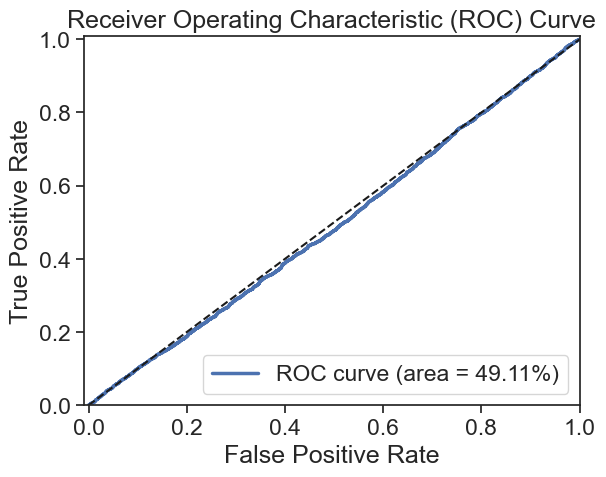

In [63]:
LR = LogisticRegression()

# LR = Pipeline([
#         #('sel', select_fetaures(select_cols=list(shadow))),
#       #  ('scl', StandardScaler()),
#         #('lda', LDA(store_covariance=True)),
#         ('gs', gs)
#  ]) 

grid_values = {'penalty': ['none', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

gs = GridSearchCV(estimator=LR, param_grid=grid_values, scoring='recall', cv=10, verbose=1, n_jobs=-1)
gs.fit(X_train,y_train)

best_LR = LogisticRegression(**gs.best_params_)
best_LR.fit(X_train, y_train)



results = get_results(best_LR, 'Logistic Regression', X_test, y_test, reasume=True)

### Naive Bayes

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 93.92%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  93.94% 
Precision: 94.01% 
Recall:    93.94% 
F1 Score:  93.94% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.92      0.96      0.94      9699
         Buy       0.96      0.92      0.94     10301

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:      
                   No buy   Buy
Actual: No buy       9285   414
        Buy           799  9502


              ROC AUC Score: 93.99%


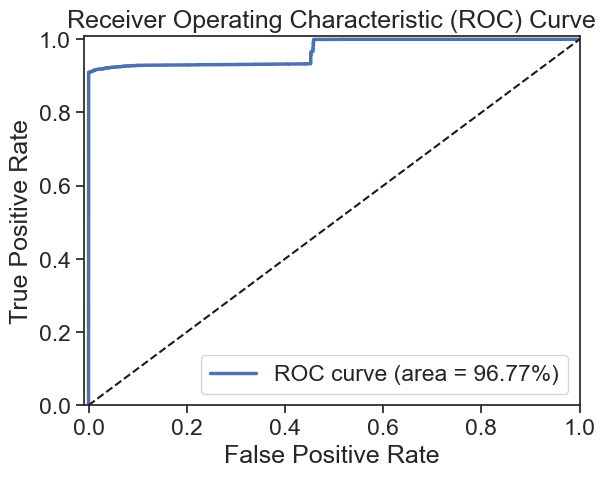

In [10]:
target_names = ['No buy', 'Buy']
starting_timenb = datetime.datetime.now()
clf = Pipeline([
        ('clf', GaussianNB())])  
param_grid = {}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
NB = Pipeline([('gs', gs)]) 


NB.fit(X_train,y_train)
results = get_results(NB, 'Naive Bayes', X_test, y_test, 
                      target_names = target_names, reasume=True)

end_timenb = datetime.datetime.now()
difnb= end_timenb - starting_timenb
results_imbalanced = results.copy()

### KNN 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 99.90%
------------------------------------------------------------
Best Parameters:
{'clf__metric': 'manhattan', 'clf__n_neighbors': 23}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  99.91% 
Precision: 99.91% 
Recall:    99.91% 
F1 Score:  99.91% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       1.00      1.00      1.00      9699
         Buy       1.00      1.00      1.00     10301

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:       
                   No buy    Buy
Actual: No buy       9689     10
        Buy             8  10293


   

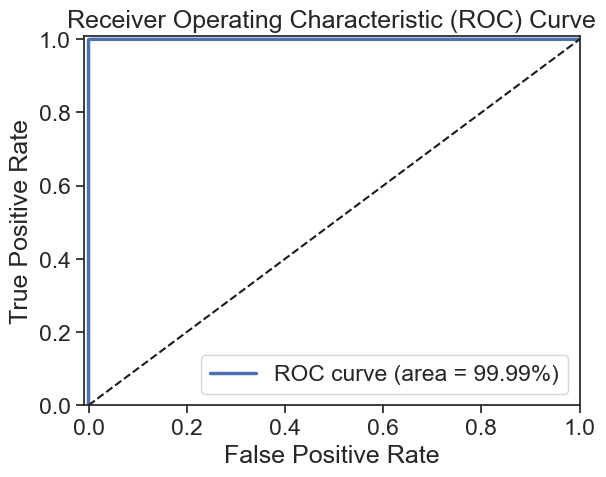

In [11]:
cols_clean = cols
starting_timeknn = datetime.datetime.now()
clf = Pipeline([
        ('clf', KNeighborsClassifier())]) 
# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__n_neighbors': [23]   #range(1,200,2)
     ,'clf__metric': ['manhattan'] #['manhattan', 'euclidean', 'minkowski '] 
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

KNNC = Pipeline([
      #  ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

KNNC.fit(X_train,y_train)

results = get_results(KNNC, 'KNN', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timeknn = datetime.datetime.now()
difknn = end_timeknn - starting_timeknn
results_imbalanced = results_imbalanced.append(results)

### Decision Tree

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 99.86%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 117}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  99.90% 
Precision: 99.90% 
Recall:    99.90% 
F1 Score:  99.90% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       1.00      1.00      1.00      9699
         Buy       1.00      1.00      1.00     10301

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:       
                   No buy    Buy
Actual: No buy       9697      2
        Bu

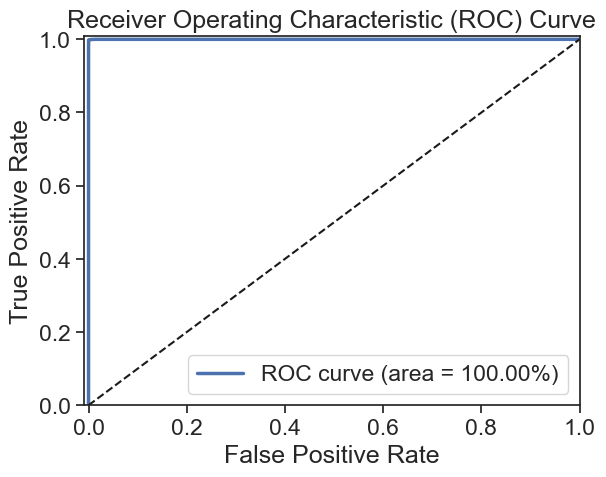

In [19]:
starting_timedt = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', DecisionTreeClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__criterion': ['entropy'] #['gini', 'entropy']
      ,'clf__max_depth': [6] #range(1, 51) # [15, 20, 25]
      ,'clf__min_samples_leaf':  [117]  # range(100, 150) 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
DT = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

DT.fit(X_train,y_train)

results = get_results(DT, 'Decision Tree', X_test, y_test, target_names = target_names, results = results, reasume=False)
end_timedt = datetime.datetime.now()
difdt= end_timedt - starting_timedt
results_imbalanced = results_imbalanced.append(results)

### Support Vector Machines

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 51.23%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.06, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  51.51% 
Precision: 26.53% 
Recall:    51.51% 
F1 Score:  35.02% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       0.00      0.00      0.00      9699
         Buy       0.52      1.00      0.68     10301

    accuracy                           0.52     20000
   macro avg       0.26      0.50      0.34     20000
weighted avg       0.27      0.52      0.35     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:       
                   No buy    Buy
Actual: No buy          0   9699
        Buy             0  10301


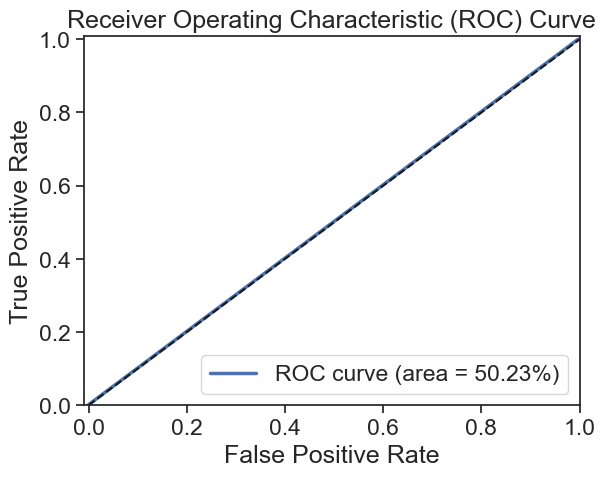

In [22]:
from sklearn.svm import SVC, LinearSVC
starting_timesvm = datetime.datetime.now()
clf = Pipeline([
      #  ('pca', PCA()),
        ('clf', SVC())])
 

# a list of dictionaries to specify the parameters that we'd want to tune
C =  [0.06] #, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
Gamma = [0.1] #[1,0.1,0.01,0.001]
Kernel = ['rbf'] #['rbf', 'poly', 'sigmoid']
SEL = cols_clean
#n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
#whiten = [True, False]

param_grid =\
    [{'clf__C': C
     ,'clf__gamma': Gamma
     ,'clf__kernel' : Kernel
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

SVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
       # ('scl', StandardScaler()),
        #('lda', LDA(n_components = 2, store_covariance=True)),
        ('gs', gs)
 ])  

SVC.fit(X_train,y_train)

results  = get_results(SVC, 'Support Vector Machine - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvm = datetime.datetime.now()
difsvm_o = end_timesvm - starting_timesvm
#results_oversampling = results_oversampling.append(results)

### Random Forest

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Mean Best Accuracy: 100.00%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_split': 117, 'clf__n_estimators': 2000}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  100.00% 
Precision: 100.00% 
Recall:    100.00% 
F1 Score:  100.00% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       1.00      1.00      1.00      9699
         Buy       1.00      1.00      1.00     10301

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:       
                   No buy    Buy
Actual: No bu

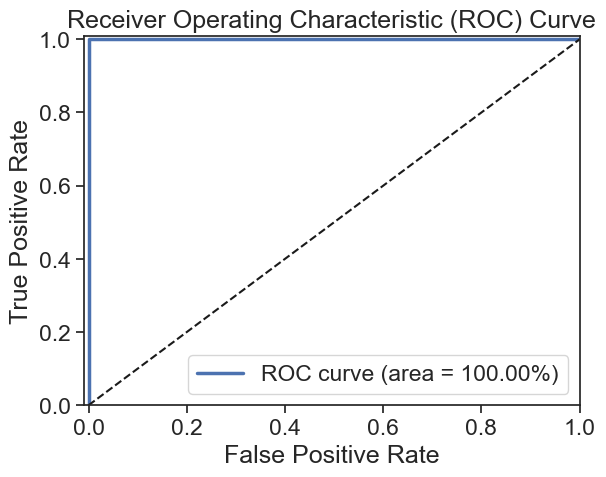

In [23]:
starting_timerf = datetime.datetime.now()
clf = Pipeline([
                #('pca', PCA()),
                ('clf', RandomForestClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{ 'clf__criterion': ['gini', 'entropy']
      ,'clf__n_estimators':  [2000]       
      ,'clf__min_samples_split': [117]
      ,'clf__max_depth': [6] #, 3, 4, 5, 10] #

}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
RF = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 
     
RF.fit(X_train,y_train)

results = get_results(RF, 'Random Forest - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timerf = datetime.datetime.now()
difrf_s = end_timerf - starting_timerf
#results_smote = results_smote.append(results)

### Gradient Boosting

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 100.00%
------------------------------------------------------------
Best Parameters:
{'clf__learning_rate': 0.01, 'clf__max_depth': 10, 'clf__n_estimators': 400}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  100.00% 
Precision: 100.00% 
Recall:    100.00% 
F1 Score:  100.00% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       1.00      1.00      1.00      9699
         Buy       1.00      1.00      1.00     10301

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:       
                   No buy    Buy
Actual: No buy       9699      0
        B

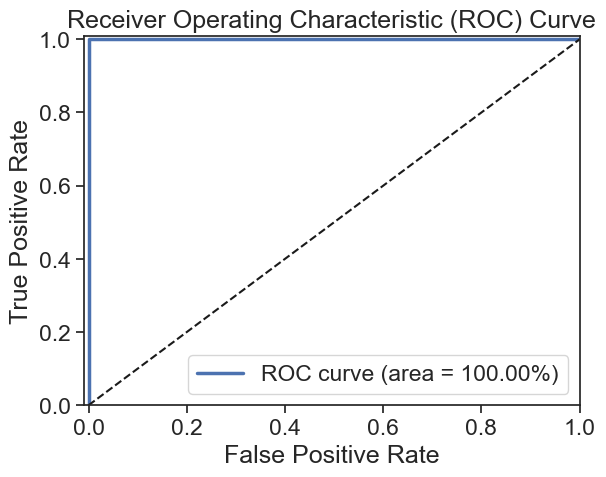

In [24]:
starting_timegb = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', GradientBoostingClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [1e-02] #, 5e-03, 2e-02]
     ,'clf__max_depth': [10]
     ,'clf__n_estimators' : [400] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

GBC = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ])  

GBC.fit(X_train,y_train)

results = get_results(GBC, 'Gradient Boosting - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timegb = datetime.datetime.now()
difgb_s = end_timegb - starting_timegb
#results_smote = results_smote.append(results)

### AdaBoost

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Mean Best Accuracy: 100.00%
------------------------------------------------------------
Best Parameters:
{'clf__algorithm': 'SAMME.R', 'clf__learning_rate': 0.2, 'clf__n_estimators': 500}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  100.00% 
Precision: 100.00% 
Recall:    100.00% 
F1 Score:  100.00% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       1.00      1.00      1.00      9699
         Buy       1.00      1.00      1.00     10301

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000


Prediction Confusion Matrix:
------------------------------
               Predicted:       
                   No buy    Buy
Actual: No buy       9699      0
   

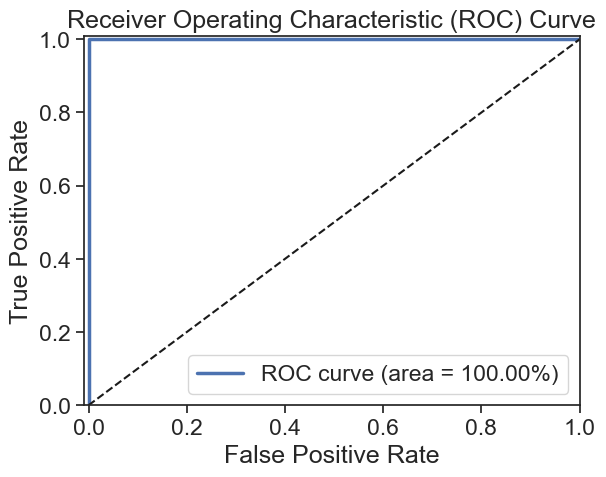

In [25]:
starting_timeab = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', AdaBoostClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

ADAB = Pipeline([
     #   ('scl', StandardScaler()),
        ('gs', gs)
 ])  

ADAB.fit(X_train,y_train)

results = get_results(ADAB, 'AdaBoost - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
results_imbalanced = results_imbalanced.append(results)
end_timeab = datetime.datetime.now()
difab_s = end_timeab - starting_timeab
#results_smote = results_smote.append(results)